In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np
import plotly.express as px
from matplotlib.ticker import MultipleLocator, FuncFormatter

In [45]:
# pd.options.display.float_format = "{:,.0f}".format

this allows for all floats in the notebook to display with commas and no decimals, but will keep the data as numeric for things such as plotting

In [46]:
df_ky_income = pd.read_csv("../data/HDPulse_data_income.csv", skiprows=4)
df_renamed_inc = df_ky_income.rename(columns={'Rank within US (of 3141 counties)': 'Median Household Income Rank Within US (of 3141 counties)'}, inplace=False)

df_renamed_inc.head(130)

df_ky_education = pd.read_csv("../data/HDPulse_data_education.csv", skiprows=5)
df_renamed_edu = df_ky_education.rename(columns={'Rank within US (of 3143 counties)': "Education Rank Within US (of 3141 counties)"}, inplace=False)

df_renamed_edu.head(130)

df_income_allstates_inc = pd.read_csv("../data/HDPulse_data_income_allstates.csv", skiprows=4)
df_renamed_allstates_inc = df_income_allstates_inc.rename(columns={"Value (Dollars)": "Median Household Income (Dollars)"}, inplace=False)

df_renamed_allstates_inc.head(60)

df_education_allstates = pd.read_csv("../data/HDPulse_data_education_allstates.csv", skiprows=5)
df_renamed_allstates_edu = df_education_allstates.rename(columns={"Value (Percent)": "People (Education: At Least Bachelor's Degree) %"}, inplace=False)

df_renamed_allstates_edu.head(60)


df_rucc = pd.read_csv("../data/rucc_codes_2023.csv", encoding='latin1')
df_rucc['FIPS'] = df_rucc['FIPS'].astype(str).str.zfill(5)
df_rucc.head(100)

,FIPS,State,County_Name,Attribute,Value
0,01001,AL,Autauga County,Population_2020,58805
1,01001,AL,Autauga County,RUCC_2023,2
2,01001,AL,Autauga County,Description,"Metro - Counties in metro areas of 250,000 to ..."
3,01003,AL,Baldwin County,Population_2020,231767
4,01003,AL,Baldwin County,RUCC_2023,3
...,...,...,...,...,...
95,01063,AL,Greene County,Description,"Metro - Counties in metro areas of 250,000 to ..."
96,01065,AL,Hale County,Population_2020,14785
97,01065,AL,Hale County,RUCC_2023,2
98,01065,AL,Hale County,Description,"Metro - Counties in metro areas of 250,000 to ..."


In [47]:
merged_df_ky = pd.merge(df_renamed_inc, df_renamed_edu, on="County", how="outer")

merged_df_ky.head(130)

,County,FIPS_x,Value (Dollars),Median Household Income Rank Within US (of 3141 counties),FIPS_y,Value (Percent),People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,Adair County,"21,001","50,316","2,664","21,001",19,"2,402","2,043"
1,Allen County,"21,003","59,029","2,016","21,003",17,"2,546","2,295"
2,Anderson County,"21,005","71,747",917,"21,005",26,"4,290","1,028"
3,Ballard County,"21,007","64,740","1,468","21,007",19,"1,028","2,064"
4,Barren County,"21,009","49,171","2,736","21,009",18,"5,497","2,228"
...,...,...,...,...,...,...,...,...
125,Wayne County,"21,231","41,933","3,006","21,231",14,"1,931","2,830"
126,Webster County,"21,233","58,786","2,049","21,233",13,"1,099","2,944"
127,Whitley County,"21,235","41,719","3,015","21,235",20,"4,580","1,871"
128,Wolfe County,"21,237","29,052","3,136","21,237",7,333,"3,133"


In [48]:
row_us = merged_df_ky[merged_df_ky['County'] == 'United States']

row_ky = merged_df_ky[merged_df_ky['County'] == 'Kentucky']

remaining = merged_df_ky[
    (merged_df_ky['County'] != 'United States') & 
    (merged_df_ky['County'] != 'Kentucky')
]

merged_df_reordered = pd.concat([row_us, row_ky, remaining], ignore_index=True)

merged_df_reordered = merged_df_reordered.drop(columns=['FIPS_y'])

merged_df_reordered.rename(columns={'FIPS_x': "FIPS (Federal Information Processing Standards)"}, inplace=True)

merged_df_reordered.head(130)

,County,FIPS (Federal Information Processing Standards),Value (Dollars),Median Household Income Rank Within US (of 3141 counties),Value (Percent),People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,United States,0,"78,538",NaN,35,"79,954,302",NaN
1,Kentucky,"21,000","62,417",45 of 52,27,"830,856",48 of 52
2,Adair County,"21,001","50,316","2,664",19,"2,402","2,043"
3,Allen County,"21,003","59,029","2,016",17,"2,546","2,295"
4,Anderson County,"21,005","71,747",917,26,"4,290","1,028"
...,...,...,...,...,...,...,...
125,Wayne County,"21,231","41,933","3,006",14,"1,931","2,830"
126,Webster County,"21,233","58,786","2,049",13,"1,099","2,944"
127,Whitley County,"21,235","41,719","3,015",20,"4,580","1,871"
128,Wolfe County,"21,237","29,052","3,136",7,333,"3,133"


In [49]:
merged_df_reordered = merged_df_reordered[
    ~merged_df_reordered['County'].str.contains(
        "For more information|An ecosystem|Median incomes over|Data not available|Notes|Demographic data provided|Suggested Citation",
        case=False, na=False
    )
]

merged_df_reordered.head(122)

,County,FIPS (Federal Information Processing Standards),Value (Dollars),Median Household Income Rank Within US (of 3141 counties),Value (Percent),People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,United States,0,"78,538",NaN,35,"79,954,302",NaN
1,Kentucky,"21,000","62,417",45 of 52,27,"830,856",48 of 52
2,Adair County,"21,001","50,316","2,664",19,"2,402","2,043"
3,Allen County,"21,003","59,029","2,016",17,"2,546","2,295"
4,Anderson County,"21,005","71,747",917,26,"4,290","1,028"
...,...,...,...,...,...,...,...
125,Wayne County,"21,231","41,933","3,006",14,"1,931","2,830"
126,Webster County,"21,233","58,786","2,049",13,"1,099","2,944"
127,Whitley County,"21,235","41,719","3,015",20,"4,580","1,871"
128,Wolfe County,"21,237","29,052","3,136",7,333,"3,133"


In [50]:
# merged_df_reordered.replace("Missing value", np.nan, inplace=True)
# merged_df_reordered.head(122).fillna("")

This was commented out and I will reimplement this later in the code for visual enhancement

In [51]:
merged_df_reordered["People (Education: At Least Bachelor's Degree)"] = merged_df_reordered["People (Education: At Least Bachelor's Degree)"].astype(float).astype(int)


In [52]:
merged_df_reordered["People (Education: At Least Bachelor's Degree)"] = \
    merged_df_reordered["People (Education: At Least Bachelor's Degree)"].apply(lambda x: f"{int(x):,}")

merged_df_reordered.head(122)

,County,FIPS (Federal Information Processing Standards),Value (Dollars),Median Household Income Rank Within US (of 3141 counties),Value (Percent),People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,United States,0,"78,538",NaN,35,"79,954,302",NaN
1,Kentucky,"21,000","62,417",45 of 52,27,"830,856",48 of 52
2,Adair County,"21,001","50,316","2,664",19,"2,402","2,043"
3,Allen County,"21,003","59,029","2,016",17,"2,546","2,295"
4,Anderson County,"21,005","71,747",917,26,"4,290","1,028"
...,...,...,...,...,...,...,...
125,Wayne County,"21,231","41,933","3,006",14,"1,931","2,830"
126,Webster County,"21,233","58,786","2,049",13,"1,099","2,944"
127,Whitley County,"21,235","41,719","3,015",20,"4,580","1,871"
128,Wolfe County,"21,237","29,052","3,136",7,333,"3,133"


In [53]:
merged_df_reordered['Value (Percent)'] = merged_df_reordered['Value (Percent)'].astype(str)

merged_df_reordered.head(122)

,County,FIPS (Federal Information Processing Standards),Value (Dollars),Median Household Income Rank Within US (of 3141 counties),Value (Percent),People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,United States,0,"78,538",NaN,35.0,"79,954,302",NaN
1,Kentucky,"21,000","62,417",45 of 52,27.0,"830,856",48 of 52
2,Adair County,"21,001","50,316","2,664",18.8,"2,402","2,043"
3,Allen County,"21,003","59,029","2,016",17.4,"2,546","2,295"
4,Anderson County,"21,005","71,747",917,25.7,"4,290","1,028"
...,...,...,...,...,...,...,...
125,Wayne County,"21,231","41,933","3,006",13.7,"1,931","2,830"
126,Webster County,"21,233","58,786","2,049",12.6,"1,099","2,944"
127,Whitley County,"21,235","41,719","3,015",19.8,"4,580","1,871"
128,Wolfe County,"21,237","29,052","3,136",7.4,333,"3,133"


In [54]:
merged_df_reordered['FIPS (Federal Information Processing Standards)'] = \
    merged_df_reordered['FIPS (Federal Information Processing Standards)'].astype(int).astype(str).str.zfill(5)

merged_df_reordered.head(122)

,County,FIPS (Federal Information Processing Standards),Value (Dollars),Median Household Income Rank Within US (of 3141 counties),Value (Percent),People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,United States,00000,"78,538",NaN,35.0,"79,954,302",NaN
1,Kentucky,21000,"62,417",45 of 52,27.0,"830,856",48 of 52
2,Adair County,21001,"50,316","2,664",18.8,"2,402","2,043"
3,Allen County,21003,"59,029","2,016",17.4,"2,546","2,295"
4,Anderson County,21005,"71,747",917,25.7,"4,290","1,028"
...,...,...,...,...,...,...,...
125,Wayne County,21231,"41,933","3,006",13.7,"1,931","2,830"
126,Webster County,21233,"58,786","2,049",12.6,"1,099","2,944"
127,Whitley County,21235,"41,719","3,015",19.8,"4,580","1,871"
128,Wolfe County,21237,"29,052","3,136",7.4,333,"3,133"


convert to str with zero-padding for better readability and consistency and preparing for potential future merges with other datasets

In [55]:
merged_df_reordered.rename(columns={"Value (Dollars)": "Median Household Income (Dollars)"}, inplace=True)

merged_df_reordered.rename(columns={"Value (Percent)": "People (Education: At Least Bachelor's Degree) %"}, inplace=True)

merged_df_reordered.head(122)

,County,FIPS (Federal Information Processing Standards),Median Household Income (Dollars),Median Household Income Rank Within US (of 3141 counties),People (Education: At Least Bachelor's Degree) %,People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,United States,00000,"78,538",NaN,35.0,"79,954,302",NaN
1,Kentucky,21000,"62,417",45 of 52,27.0,"830,856",48 of 52
2,Adair County,21001,"50,316","2,664",18.8,"2,402","2,043"
3,Allen County,21003,"59,029","2,016",17.4,"2,546","2,295"
4,Anderson County,21005,"71,747",917,25.7,"4,290","1,028"
...,...,...,...,...,...,...,...
125,Wayne County,21231,"41,933","3,006",13.7,"1,931","2,830"
126,Webster County,21233,"58,786","2,049",12.6,"1,099","2,944"
127,Whitley County,21235,"41,719","3,015",19.8,"4,580","1,871"
128,Wolfe County,21237,"29,052","3,136",7.4,333,"3,133"


renamed columns to more accurately reprsent the data for better visualization and less less confusion

In [56]:
merged_df_reordered["People (Education: At Least Bachelor's Degree) %"] = (
    merged_df_reordered["People (Education: At Least Bachelor's Degree) %"]
    .replace(",", "", regex=True)
    .astype(float)
)

merged_df_reordered["Median Household Income (Dollars)"] = (
    merged_df_reordered["Median Household Income (Dollars)"]
    .replace(",", "", regex=True)
    .astype(float)
)

converted the columns to numeric to be able to display in charts/graphs

In [57]:
merged_df_reordered.head(122)

,County,FIPS (Federal Information Processing Standards),Median Household Income (Dollars),Median Household Income Rank Within US (of 3141 counties),People (Education: At Least Bachelor's Degree) %,People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,United States,00000,"78,538",NaN,35,"79,954,302",NaN
1,Kentucky,21000,"62,417",45 of 52,27,"830,856",48 of 52
2,Adair County,21001,"50,316","2,664",19,"2,402","2,043"
3,Allen County,21003,"59,029","2,016",17,"2,546","2,295"
4,Anderson County,21005,"71,747",917,26,"4,290","1,028"
...,...,...,...,...,...,...,...
125,Wayne County,21231,"41,933","3,006",14,"1,931","2,830"
126,Webster County,21233,"58,786","2,049",13,"1,099","2,944"
127,Whitley County,21235,"41,719","3,015",20,"4,580","1,871"
128,Wolfe County,21237,"29,052","3,136",7,333,"3,133"


In [58]:
merged_df_reordered.dtypes

County                                                        object
FIPS (Federal Information Processing Standards)               object
Median Household Income (Dollars)                            float64
Median Household Income Rank Within US (of 3141 counties)     object
People (Education: At Least Bachelor's Degree) %             float64
People (Education: At Least Bachelor's Degree)                object
Education Rank Within US (of 3141 counties)                   object
dtype: object

checked the data types of the columns

In [59]:
# plt.figure(figsize=(10, 6))
# plt.scatter(
#     merged_df_reordered["People (Education: At Least Bachelor's Degree) %"],
#     merged_df_reordered["Median Household Income (Dollars)"],
#     color='blue',
#     alpha=0.7
# )

# plt.title("Correlation: Education vs Median Household Income (KY Counties)")
# plt.xlabel("People with Bachelor's Degree or Higher (%)")
# plt.ylabel("Median Household Income ($)")
# plt.grid(True)
# plt.show()

In [60]:
df_plot = merged_df_reordered.loc[2:].copy()

df_plot["People (Education: At Least Bachelor's Degree) %"] = (
    df_plot["People (Education: At Least Bachelor's Degree) %"]
    .replace(",", "", regex=True)
    .astype(float)
)

df_plot["Median Household Income (Dollars)"] = (
    df_plot["Median Household Income (Dollars)"]
    .replace(",", "", regex=True)
    .astype(float)
)

df_plot["People (Education: At Least Bachelor's Degree)"] = (
    df_plot["People (Education: At Least Bachelor's Degree)"]
    .replace(",", "", regex=True)
    .astype(float)
)

fig = px.scatter(
    df_plot,
    x="People (Education: At Least Bachelor's Degree) %",
    y="Median Household Income (Dollars)",
    size="People (Education: At Least Bachelor's Degree)",  # bubble size
    hover_name="County",  # replace with the column that has county names
    size_max=60,          # max bubble size
    color="Median Household Income (Dollars)",
)

fig.update_layout(
    title="Education vs Median Household Income (Bubble Size = Population)",
    xaxis_title="Percentage with Bachelor's Degree or Higher",
    yaxis_title="Median Household Income ($)",
    template="plotly_white"
)

converted a column to numeric, to be able to do math functions with that column

also skipped the first two rows (United States & Kentucky) because they are not traditional counties

induced an interactive version to show counties when hovered over with plotly (installed dependency: 'nbformat' as well)

In [61]:
df_renamed_allstates_inc = df_renamed_allstates_inc[
    ~df_renamed_allstates_inc['State'].str.contains(
        "For more information|An ecosystem|Median incomes over|Data not available|Notes|Demographic data provided|Suggested Citation",
        case=False, na=False
    )
]

df_renamed_allstates_inc.head(53)

,State,FIPS,Median Household Income (Dollars),Rank within US (of 52 states)
0,United States,0,"78,538",NaN
1,Puerto Rico,"72,001","25,096",52
2,Mississippi,"28,000","54,915",51
3,West Virginia,"54,000","57,917",50
4,Arkansas,"5,000","58,773",49
5,Louisiana,"22,000","60,023",48
6,Alabama,"1,000","62,027",47
7,New Mexico,"35,000","62,125",46
8,Kentucky,"21,000","62,417",45
9,Oklahoma,"40,000","63,603",44


In [62]:
states_to_compare = ["Maryland", "Massachusetts", "Mississippi", "West Virginia", "Nevada", "Wisconsin", "Nebraska"]

df_allstates_subset_inc = df_renamed_allstates_inc[df_renamed_allstates_inc["State"].isin(states_to_compare)].copy()

df_allstates_subset_inc["Median Household Income (Dollars)"] = pd.to_numeric(
    df_allstates_subset_inc["Median Household Income (Dollars)"].replace(',', '', regex=True),
    errors='coerce'
)

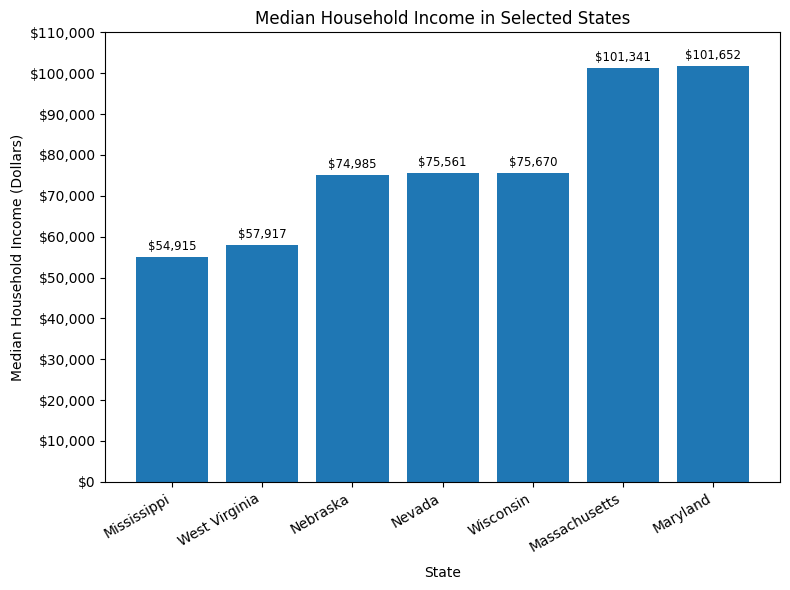

In [63]:
def dollar_format(x, pos):
    return f"${int(x):,}"  # adds $ and thousands comma

formatter = FuncFormatter(dollar_format)

plt.figure(figsize=(8,6))
bars = plt.bar(df_allstates_subset_inc["State"], df_allstates_subset_inc["Median Household Income (Dollars)"])
plt.xlabel("State", labelpad=8)
plt.ylabel("Median Household Income (Dollars)")
plt.title("Median Household Income in Selected States")
plt.ylim(0, 110000)
plt.gca().yaxis.set_major_locator(MultipleLocator(10000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=30, fontsize=10, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f"${int(yval):,}", 
             ha='center', va='bottom', fontsize=8.5)

plt.tight_layout()
plt.show()

The states I chose to use to display the variance of income are the lowest two median household income states within the US, the middle three, and the two highest (excluding D.C. and Puerto Rico).

In [64]:
# drops rows that contain specific phrases such as "an ecosystem", 

df_renamed_allstates_edu = df_renamed_allstates_edu[
    ~df_renamed_allstates_edu['State'].str.contains(
        "For more information|An ecosystem|Median incomes over|Data not available|Notes|Demographic data provided|Suggested Citation",
        case=False, na=False
    )
]

df_allstates_subset_edu = df_renamed_allstates_edu[df_renamed_allstates_edu["State"] != "United States"]

df_allstates_subset_edu.head(53)

,State,FIPS,People (Education: At Least Bachelor's Degree) %,People (Education: At Least Bachelor's Degree),Rank within US (of 52 states)
1,West Virginia,"54,000",23,"295,541",52
2,Mississippi,"28,000",24,"475,997",51
3,Arkansas,"5,000",25,"513,221",50
4,Louisiana,"22,000",27,"825,794",49
5,Kentucky,"21,000",27,"830,856",48
6,Nevada,"32,000",27,"601,393",47
7,Alabama,"1,000",28,"957,081",45
8,Oklahoma,"40,000",28,"733,793",45
9,Indiana,"18,000",29,"1,313,086",44
10,Puerto Rico,"72,001",29,"702,653",43


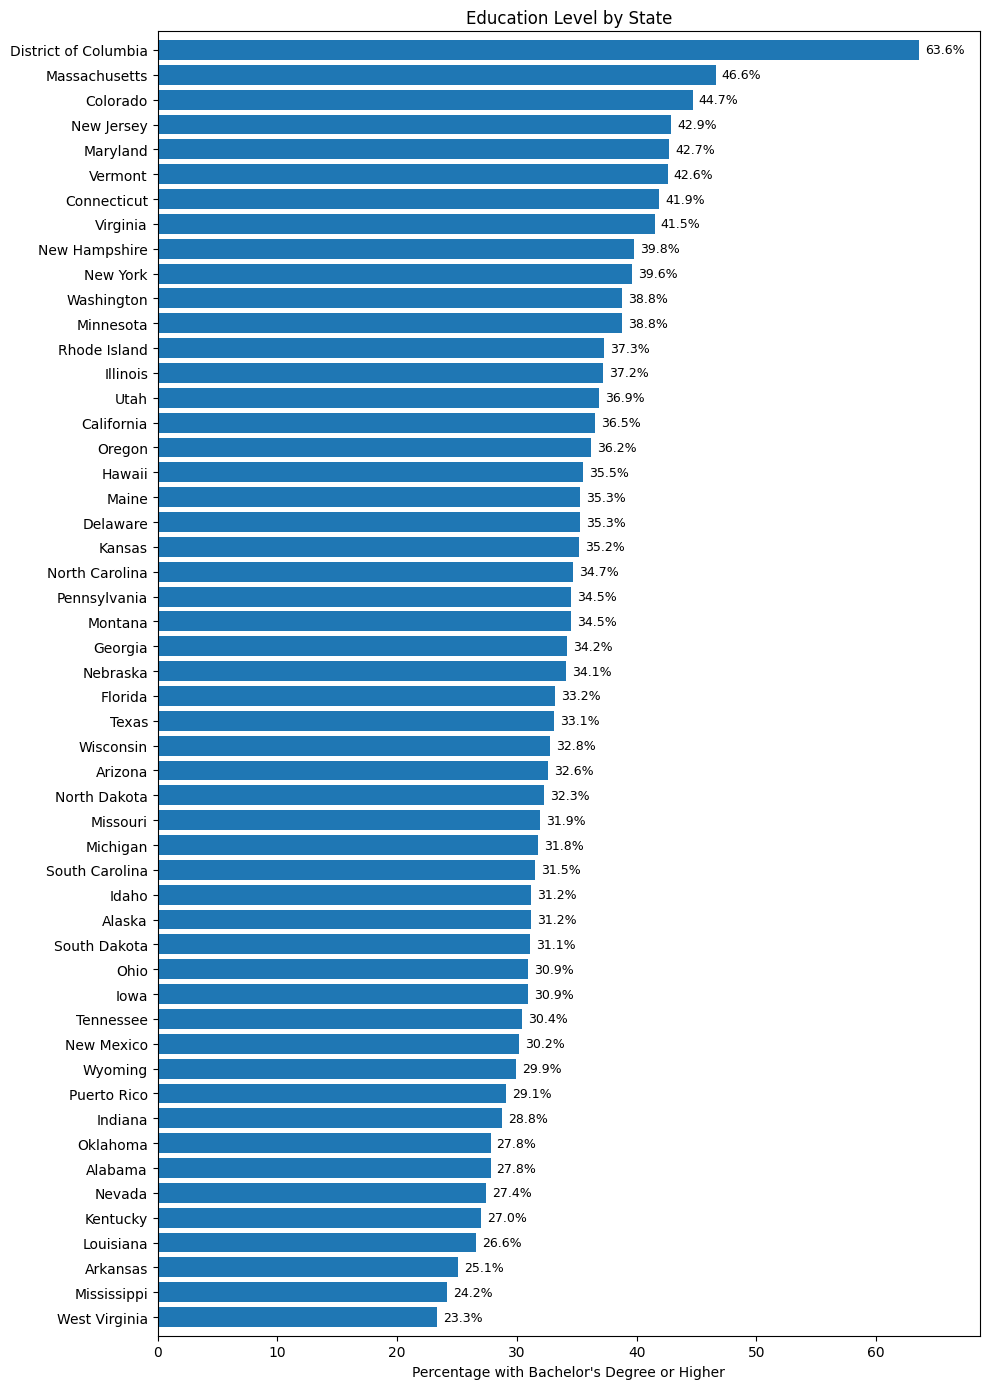

In [65]:
# plt.figure(figsize=(10,14))
# plt.barh(df_allstates_subset_edu["State"], df_allstates_subset_edu["People (Education: At Least Bachelor's Degree) %"], height=0.8)
# plt.xlabel("Percentage with Bachelor's Degree or Higher")
# plt.title("Education Level by State")
# plt.ylim(-0.75, len(df_allstates_subset_edu["State"]) - 1 + 0.75)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(10,14))

bars = plt.barh(
    df_allstates_subset_edu["State"], 
    df_allstates_subset_edu["People (Education: At Least Bachelor's Degree) %"], 
    height=0.8
)

plt.xlabel("Percentage with Bachelor's Degree or Higher")
plt.title("Education Level by State")
max_val = df_allstates_subset_edu["People (Education: At Least Bachelor's Degree) %"].max()
plt.xlim(0, max_val * 1.08)
plt.ylim(-0.75, len(df_allstates_subset_edu["State"]) - 1 + 0.75)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5,
        bar.get_y() + bar.get_height()/2,
        f"{width:.1f}%",
        ha='left',
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()